In [1]:
import numpy as np
import time
from math import sqrt, pi, exp
import functools
import scipy
import matplotlib.pylab as pl
from varname import nameof


from utils.preconditioners import *
from utils.algorithms import *
from utils.functions import *

### Test case "Gaussian"

[[0.25 0.  ]
 [0.   0.1 ]]


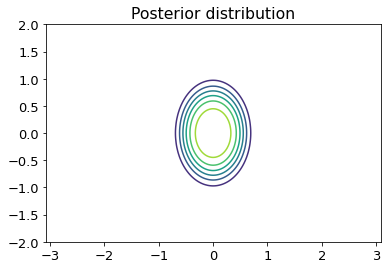

In [2]:
d = 2

y = 0 
xmin = -2
xmax = 2
ymin= -2
ymax= 2


# potential function
sigNoise = 0.5
sigPrior = 2

A = np.asarray([[2,0], [0,4]])
G2 = lambda u: np.linalg.norm(np.dot(A.T, u))**2
G = lambda u: (u[1])**2 + 2*(u[0])**2 # model
Phi = lambda u: 0.5/(sigNoise**2)*(G(u)-y)**2 #likelihood

# potential function
I = lambda u: Phi(u) + 0.5/(sigPrior**2)*np.linalg.norm(u,axis=0)**2

# compute Sigma posterior (the target covariance matrix)

K_inv = np.eye(d,d)*sigPrior + functools.reduce(np.dot, [A.T, np.eye(d,d)*sigNoise,A])
K = np.linalg.solve(K_inv,np.eye(d,d))
print(K)

# plot posterior

u0s = np.linspace(xmin,xmax,150) # draw a grid of 150 points in 2d
u1s = np.linspace(ymin,ymax,150)
U0, U1 = np.meshgrid(u0s,u1s)
U = np.stack((U0,U1)) # size (2, 150, 150)
#print(U.shape)

plt.figure()
plt.contour(U0, U1, np.exp(-I(U))) 
plt.title("Posterior distribution")
plt.axis('equal')
plt.show()


### Try algorithms

In [3]:
# parameters of all the algorithms

J = 20  # number of particles 
N_sim = 5000 # number of iterations
d = 2 # dimension
tau = 0.01 # step size

# parameters of our algorithm
const = 1.5 


Text(0.5, 1.0, 'Posterior distribution and initialization')

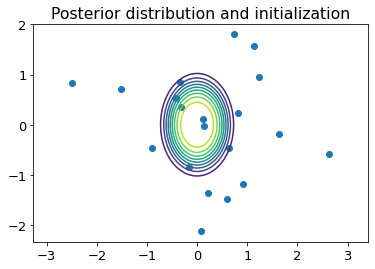

In [4]:
# initial position of the particles

u0 = np.random.normal(0,1.0,(d,J)) 

plt.figure()
plt.contour(U0, U1, np.exp(-I(U)), 10)
plt.scatter(u0[0],u0[1])
plt.axis('equal')
plt.title("Posterior distribution and initialization")

In [5]:
# ULA
start_time = time.time()
us_list_ULA = run_ULA(I, N_sim, u0, tau)
us_list_ULA.tofile('save_data/gaussian/ULA_J_'+str(us_list_ULA.shape[1])+'_Nsim_'+str(us_list_ULA.shape[2])+'_tau_'+str(tau)+'.dat')
print(f"ULA: {time.time()-start_time} seconds")

# ALDI 
start_time = time.time()
us_list_ALDI = run_ALDI_with_gradient(I, N_sim, u0, tau)
us_list_ALDI.tofile('save_data/gaussian/ALDI_J_'+str(us_list_ALDI.shape[1])+'_Nsim_'+str(us_list_ALDI.shape[2])+'_tau_'+str(tau)+'.dat')
print(f"ALDI with gradient: {time.time()-start_time} seconds")


# NRALDI (our scheme)

# eventually new parameters like stepsize

#N_sim = 1000 # number of iterations
tau_ALDINR = 1e-4
#tau_ALDINR = tau

start_time = time.time()
us_list_ALDINR, means = run_ALDINR(I, N_sim, u0, tau_ALDINR, const)
us_list_ALDINR.tofile('save_data/gaussian/ALDINR_J_'+str(us_list_ALDINR.shape[1])+'_Nsim_'+str(us_list_ALDINR.shape[1])+'_tau_'+str(tau_ALDINR)+'.dat')
print(f"ALDI: {time.time()-start_time} seconds")


ULA: 62.74085021018982 seconds
ALDI with gradient: 87.05474400520325 seconds
iter
0
0.9289279988533072
0.9326208094780528
0.9388756669544294
0.9536394506406712
0.9459071361333832
0.9526071367728988
0.9557297909783274
0.9318620378818641
0.9228540713658774
0.9166594907528359
0.8896760339467733


/Users/annakorba/Desktop/square/code_eks/utils/algorithms.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  us_list_ALDINR[:,:,n+1] = us+tau*drift  + np.sqrt(tau)*diff


0.869209342552862
0.8468106399958331
0.8146348446528383
0.7872249940374432
0.7682577876183081
0.7334251115084311
0.6974430503325995
0.668243633512535
0.6470848007905612
0.6130171608218595
0.5907402872444594
0.571743002988113
0.5516947821270918
0.5332334691570293
0.5192029192008688
0.4920842642671258
0.47853521054558834
0.47342335839061167
0.4559484677382202
0.43464378863610065
0.4210618921874143
0.4122044993430791
0.399064516793042
0.38632924768233967
0.3836173876372406
0.38296325375236306
0.36621600648631936
0.36743030766178686
0.35540204245085816
0.3552248801970883
0.3466624841916397
0.3387160143057082
0.332839775501941
0.3244628279348376
0.3211212546289548
0.3241858744591568
0.3305254682453058
0.3312681310107246
0.3435532105268344
0.36062174274638714
0.3788278708789923
0.40199434339749507
0.44127094161016944
0.4722270719976104
0.4811365036133095
0.4700580170414419
0.45768407182157
0.4537470646427251
0.43453804000265805
0.43152681506797275
0.42014664338051
0.4196150781244525
0.408602

0.13079167014928056
0.13167397389120067
0.1312681476771137
0.1291871083479852
0.1261050053672167
0.12183062812142564
0.11937729921318102
0.12101426533187593
0.12473409718824618
0.12645122043837465
0.12815830013647844
0.13151105111593026
0.13217059213318616
0.13185992127353002
0.13203962980801653
0.13543120791659075
0.13685583326240058
0.1415896544171446
0.14232526382997712
0.13930522484267582
0.14023533196412763
0.1433432169796568
0.14206681599453508
0.13800070208502563
0.13916160219252444
0.142548249975127
0.13385059822540052
0.13918268533278877
0.14285035655525297
0.14718499238195754
0.14558434001914128
0.14188373026543238
0.144684752315359
0.14855507638395954
0.15193699259647037
0.15002453400930582
0.14776272467040902
0.14686518982900126
0.14547172344418058
0.142210833673373
0.14113350781847128
0.14188766086969734
0.14764811055126792
0.14916426084118212
0.14914376072763824
0.1481973880089384
0.14990316708691853
0.1508914876362789
0.1520198974419657
0.15194327907350402
0.152263522023

0.09602812898542976
0.10132762378758417
0.09846800316000023
0.09870833842881963
0.09511030627092362
0.0959535903298237
0.09257455880814608
0.09222442316471466
0.09274216096691354
0.08889144908984448
0.08773418988300116
0.08933851510882618
0.09220827922666724
0.08652176641767265
0.0875104101220921
0.08916649181971917
0.09246365829032846
0.09313499162772998
0.09014949089534854
0.09098916172806179
0.0926496593416368
0.08689357926616967
0.09278480424309879
0.09960676789269135
0.09556340715277897
0.09502925022929667
0.09042161421914904
0.0870312244262687
0.08813508642084081
0.08909442957992197
0.09461613134773506
0.09674050097578904
0.09724234226696449
0.09799424922110964
0.10103494303456208
0.1014612194016714
0.10114095916638073
0.10379736044945496
0.10744137643331968
0.10831859921254741
0.10698344509666802
0.10986919657661887
0.11114837055834213
0.11165305539819145
0.11297317419121268
0.10986104241673642
iter
900
0.10920287535129707
0.1097248412546867
0.11514947469263583
0.118240477282517

0.16687225763660668
0.1672135527469162
0.1691828574421697
0.16638554973796846
0.16600900811798877
0.16172596775907352
0.15957796424354795
0.1574792312189298
0.15686328135439465
0.15896539858779327
0.15380934876620164
0.14938650225576547
0.14662249764113772
0.14289331267069136
0.14316673846296257
0.1376523140062527
0.1327209053479059
0.13104034114679516
0.1308176154544255
0.13333786647051926
0.12908206116155027
0.13345147201781424
0.13423153880049066
0.13444565799661579
0.13807593770899504
0.13950471815116272
0.14046857690065115
0.13761181159169886
0.13191187000780094
iter
1300
0.12872753718229163
0.13082398725457614
0.12307171961900276
0.12397058911700512
0.119302152401004
0.11865694142426259
0.1197731755823484
0.12316435555080085
0.1305221392815353
0.13143009133129793
0.12937870289273193
0.13426188552758936
0.12905228309513941
0.1271715237271047
0.1241220922810608
0.1249632227574618
0.11998961892820481
0.11928272361174974
0.1251575471761573
0.12275114414370708
0.11779833406087498
0.11

0.1855410564629276
0.18614754476685097
0.18676241539547514
0.1821601664143685
0.17962247500355955
0.17943039445872525
0.18545126632535322
0.18707019742796505
0.18904040435797387
0.1890359607390283
0.1881177018501847
0.19217276260177935
0.1836233672941977
0.17908569310274408
0.1751805982723012
iter
1700
0.17731230379824311
0.177346143110168
0.17644892096322734
0.18217062072181872
0.18695694427057355
0.193295299841543
0.19025997619788065
0.1890656796844682
0.19078807696214203
0.1919849228795302
0.1872638982484847
0.19424849349065865
0.19648453424398882
0.19719506964574743
0.19958523462809555
0.19770410412683864
0.19531775086907577
0.19620174024603787
0.19786231163758955
0.20239944632667659
0.19827347143752752
0.19990260752993
0.19532893225789488
0.19405812448323856
0.1920605951181264
0.1951822496778507
0.1913588727057733
0.18743249181177768
0.18574970966929594
0.18505821343582612
0.1851573259462529
0.18981873463209772
0.18518166539617553
0.18496130501164187
0.1833720116238309
0.178932501

0.0819830440735463
0.0845180711646879
0.08688250321530999
iter
2100
0.08893887147665523
0.08896146886946607
0.0928734718897836
0.08805474028512782
0.09029228214297648
0.08624659240278765
0.09056814237799767
0.09038475106639608
0.08943231982858067
0.08734347201477342
0.08936644371245224
0.08958714313914681
0.08816635550266347
0.08976210564452251
0.09173934785641573
0.09351082588143288
0.09118205645398884
0.09194991708931527
0.09133033464433853
0.09146844137225364
0.09309387870970084
0.09147234261258859
0.08859856641456262
0.08941213901617674
0.09757924236940092
0.0983716510758856
0.10785948126188952
0.10944719031479408
0.10986018395883172
0.10578547547061916
0.10721685935444704
0.11287722121182556
0.11251915018126643
0.11131295418590195
0.11491006122947685
0.11940918939876681
0.11776192272987301
0.11646778739260277
0.11389322765616176
0.11201822735439278
0.11128405652446285
0.10782266857047342
0.10455774020648842
0.1042244543360279
0.10557312890783731
0.1074940268612333
0.11174861044757

0.11713034138467736
0.11882072064457799
0.12201634712685717
0.1230794277432685
0.12015231856219963
0.12366024108651442
0.12105970992704025
0.11773537028783182
0.11492753557849165
0.11388554546249398
0.11389664546778568
0.1157786980398816
0.11179628688805618
0.11599056438217062
0.12187959584840084
0.12539863607611995
0.1300216973777629
0.1321895024796296
0.1285810731320543
0.1311824317608143
0.1282475187328565
0.12787457485762777
0.1228356191094976
0.12424422932527504
0.1282813336294929
0.13255106374464704
0.13824421662536607
0.13834845851908278
0.13950834711255602
0.1395956233937073
0.13404392009503652
0.13394659411287574
0.12995709268518368
0.13184269029599988
0.12890122998222303
0.12905204050563837
0.12073949037360855
0.12056627992019255
0.12203133163175943
0.1196172645117114
0.11977549894389258
0.1195565292869292
0.1230581874801217
0.12852964930212957
0.1271269467569022
0.12602284417177084
0.12085124915519957
0.11539633263560939
0.11830952614047571
0.12096549605142265
0.120971648062

0.14122120315190623
0.13861414492554483
0.13399137616565635
0.13213940710152802
0.13068619610632626
0.1345608137621211
0.13273942429345092
0.13777977785886858
0.13985804959832074
0.13408666116598256
0.12729588025797212
0.1348705180678157
0.1318762228506381
0.12844092372137467
0.12463301030861024
0.12227140215861854
0.11904449933518713
0.11782497446796752
0.11757948686309244
0.12240923305674256
0.12507116599575202
0.12558703027781887
0.12354393344257847
0.12284503110170092
0.11935802561679526
0.11799796414613567
0.11828494675620643
0.11263394963738271
0.11243627662313815
0.11190531658915692
0.11031853806586489
0.10957695000325646
0.1083565787895473
0.10354766669786142
0.10504483770904871
0.10806507728944009
0.10943813598678653
0.11338699825021714
0.10687179416078868
0.10367031823369288
0.10281321692264284
0.10091340503434382
0.10579970905666436
0.10678719114734894
0.10546576392739596
0.10532668220334279
0.10149605204871964
0.10113831885515234
0.1072535173298837
0.10597631135745661
0.106

0.12825391897137756
0.12557609179807605
0.12606072484912548
0.12292444969478725
0.12423523006963534
0.11866759685722116
0.12437380161984486
0.12723346677407582
0.12813293487039212
0.12634989944627711
0.1281337525642544
0.12731050564295554
0.12630954044231057
0.12211690374079832
0.1234013620073152
0.12403232287066192
0.12784125318574907
0.12448534667009806
0.1260077770168215
0.12793319797837263
0.13020875558093367
0.13365145823586902
0.13237735137259984
0.13210234926757866
0.13574073291167565
0.1407514067991222
0.14258096871660053
0.14149177884849043
0.13821198839633295
0.14122315543910696
0.13642633305348484
0.13631549191992476
0.13630620668013718
0.13909568318445917
0.1369088495872351
0.13494913027605204
0.13460166342577642
0.1357302973931887
0.13899331886750985
0.14062256457653002
0.13567763416028691
0.1349132190400361
0.1303621643492378
0.12761486397437344
0.13382342768434444
0.12939707267878095
0.12788567300530307
0.12726874750075506
0.1262687910502598
0.13082898033886683
0.1310529

0.0944018460586857
0.09424197868043702
0.0968528159076256
0.09560248436552121
0.10045627618452
0.10336257058238058
0.10144349183132823
0.10114781800001293
0.10165481051594702
0.09810334668220927
0.09540784156178375
0.098471669090376
0.10285106410801256
0.10018493989533372
0.09898356080214699
0.10431454605619092
0.10952562337900995
0.11046264184420364
0.11312767825987613
0.11565552082572716
0.12048450155499671
0.11898805091162118
0.11881328929141242
0.11975181702116021
0.11151798366525825
0.1188183208861354
0.11899029475543298
0.11721093314715048
0.11569304330630989
0.11290476066121519
0.11323630250728624
0.11554543087588386
0.1147934774256117
0.11027742171773308
0.1102181529412333
iter
3800
0.11385721839404034
0.11012139534244347
0.10768139910345602
0.10393163620372059
0.1026758802844379
0.10257048380358391
0.10393787485722812
0.10392853343821629
0.10233674994847246
0.10338184404844819
0.10811493029303867
0.11003832150483622
0.1123580696416126
0.10940485261484241
0.11179542966172616
0.

0.11756872589988784
0.11869816988223236
0.11878493586392863
0.11769118804701997
0.11885620474887591
0.12076001488745745
0.11722693588326066
0.11459842418663176
0.11513151949534149
0.11218823734547675
0.11519720303896064
0.11642251633339036
0.11557471137072652
0.11437891685373057
0.11750526170187803
0.12028580130722882
0.12212526356592679
0.11843799399584966
0.1170534340195211
0.1160804069056062
iter
4200
0.11317048220659652
0.10896639449624214
0.10634313562867768
0.10611150771845627
0.1027678654429008
0.10517476725889816
0.10463399460716298
0.10751834828245069
0.10867270686430565
0.1086323349545681
0.11357598829371274
0.10927106848973443
0.10433486615874808
0.10062977560134322
0.10052251269328043
0.10237753673828508
0.10009201063669985
0.10470174517759041
0.10628707568870081
0.10582770079750013
0.1045510875161723
0.10499569159051242
0.10349132715402608
0.10290490354126393
0.10762123601695976
0.10733429582688872
0.10206961821897809
0.1002909352955606
0.10088250389487355
0.09914201429763

0.10120574669209023
0.1016023212558996
0.09923206822915365
0.09463612546301045
0.09554136114391024
iter
4600
0.09650885179096422
0.09756874210125369
0.09691963699945139
0.10166144630746493
0.09894769739885387
0.10155808418830681
0.10021051177906629
0.09936921608555299
0.10515113594918446
0.10457647961268116
0.10404602305979324
0.10836491698271616
0.1060742686316945
0.10490086056704467
0.10545604277844442
0.10436931863004012
0.10055946506457317
0.10099444202833277
0.10131306916008914
0.1009698808831164
0.10308672257753196
0.1056425076642207
0.10473683497635633
0.10746801564448999
0.10278720355643825
0.0964417900554041
0.09573524932919691
0.09454192783034099
0.09167034415404332
0.08613925326156432
0.082510073991831
0.08487615184565109
0.0840488837874287
0.08302708096682984
0.08177010439387916
0.08274694327742257
0.07568472138347404
0.07284597746738411
0.06861662318787526
0.06954364893545725
0.0700141860147824
0.07379557608417217
0.07732025141415758
0.08003493072139109
0.08157771808323636

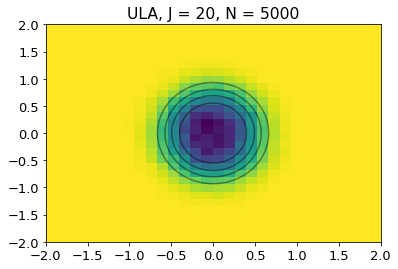

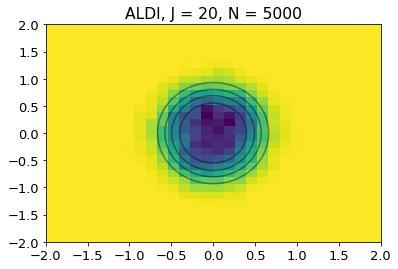

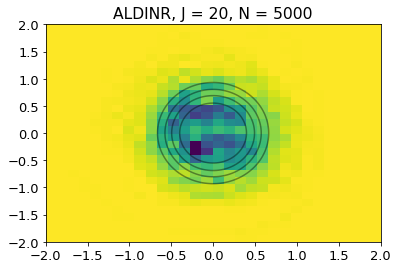

In [6]:
# plot results

name = nameof(us_list_ULA).lstrip('us_list')
plot_results(I, us_list_ULA, name)

name = nameof(us_list_ALDI).lstrip('us_list')
plot_results(I, us_list_ALDI, name)
    
name = nameof(us_list_ALDINR).lstrip('us_list')
plot_results(I, us_list_ALDINR, name)


In [ ]:
np.max(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
np.min(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
np.max(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
np.min(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
plt.hist(us_list_ALDINR[0,:,N_burnin:].flatten())

In [ ]:
plt.hist(us_list_ALDI3[0,:,N_burnin:].flatten())

In [ ]:
us_list_ALDI3[0,:,N_burnin:].flatten()

In [ ]:
plt.hist2d(us_list_ALDINR[0,:,N_burnin:].flatten(),us_list_ALDINR[1,:,N_burnin:].flatten(),bins=200)

In [ ]:
plt.hist2d(us_list_ALDI3[0,:,N_burnin:].flatten(),us_list_ALDI3[1,:,N_burnin:].flatten(),bins=200)

In [ ]:
plt.plot(dist_M)
plt.figure()
plt.plot(dist_C)

In [ ]:
dist_M[1]